In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv


In [2]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
pd.set_option('max_rows',1000)
sns.set(rc={'figure.figsize':(15,10)})
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

In [3]:
df = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv')
df_year = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv')
df_by_genres = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv')
df_w_genres = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv')
df_artist = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv')

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
df_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [6]:
df_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [7]:
df_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [8]:
df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# EXPLANATORY DATA ANALYSIS

In [10]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [11]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [12]:
df1 = df.copy()
df1['duration_ms'].head()

0    831667
1    180533
2    500062
3    210000
4    166693
Name: duration_ms, dtype: int64

In [13]:
df1['duration_ms'] = df1['duration_ms']/1000
df1.rename({'duration_ms':'duration_in_seconds'},axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   valence              170653 non-null  float64
 1   year                 170653 non-null  int64  
 2   acousticness         170653 non-null  float64
 3   artists              170653 non-null  object 
 4   danceability         170653 non-null  float64
 5   duration_in_seconds  170653 non-null  float64
 6   energy               170653 non-null  float64
 7   explicit             170653 non-null  int64  
 8   id                   170653 non-null  object 
 9   instrumentalness     170653 non-null  float64
 10  key                  170653 non-null  int64  
 11  liveness             170653 non-null  float64
 12  loudness             170653 non-null  float64
 13  mode                 170653 non-null  int64  
 14  name                 170653 non-null  object 
 15  popularity       

**Data Visualizations**

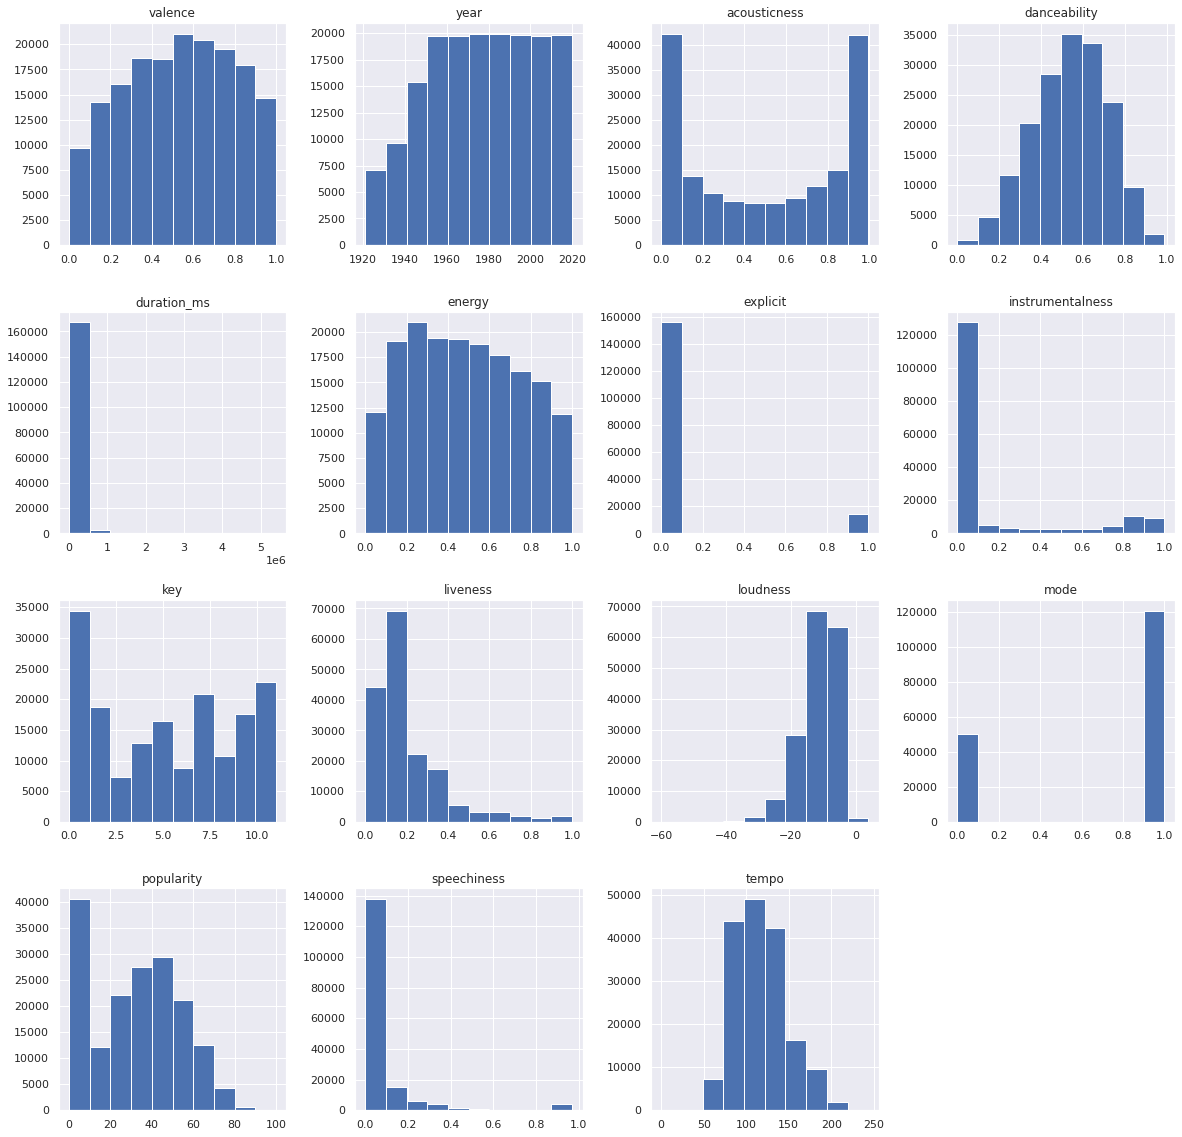

In [14]:
df.hist(figsize=(20,20))
plt.show()

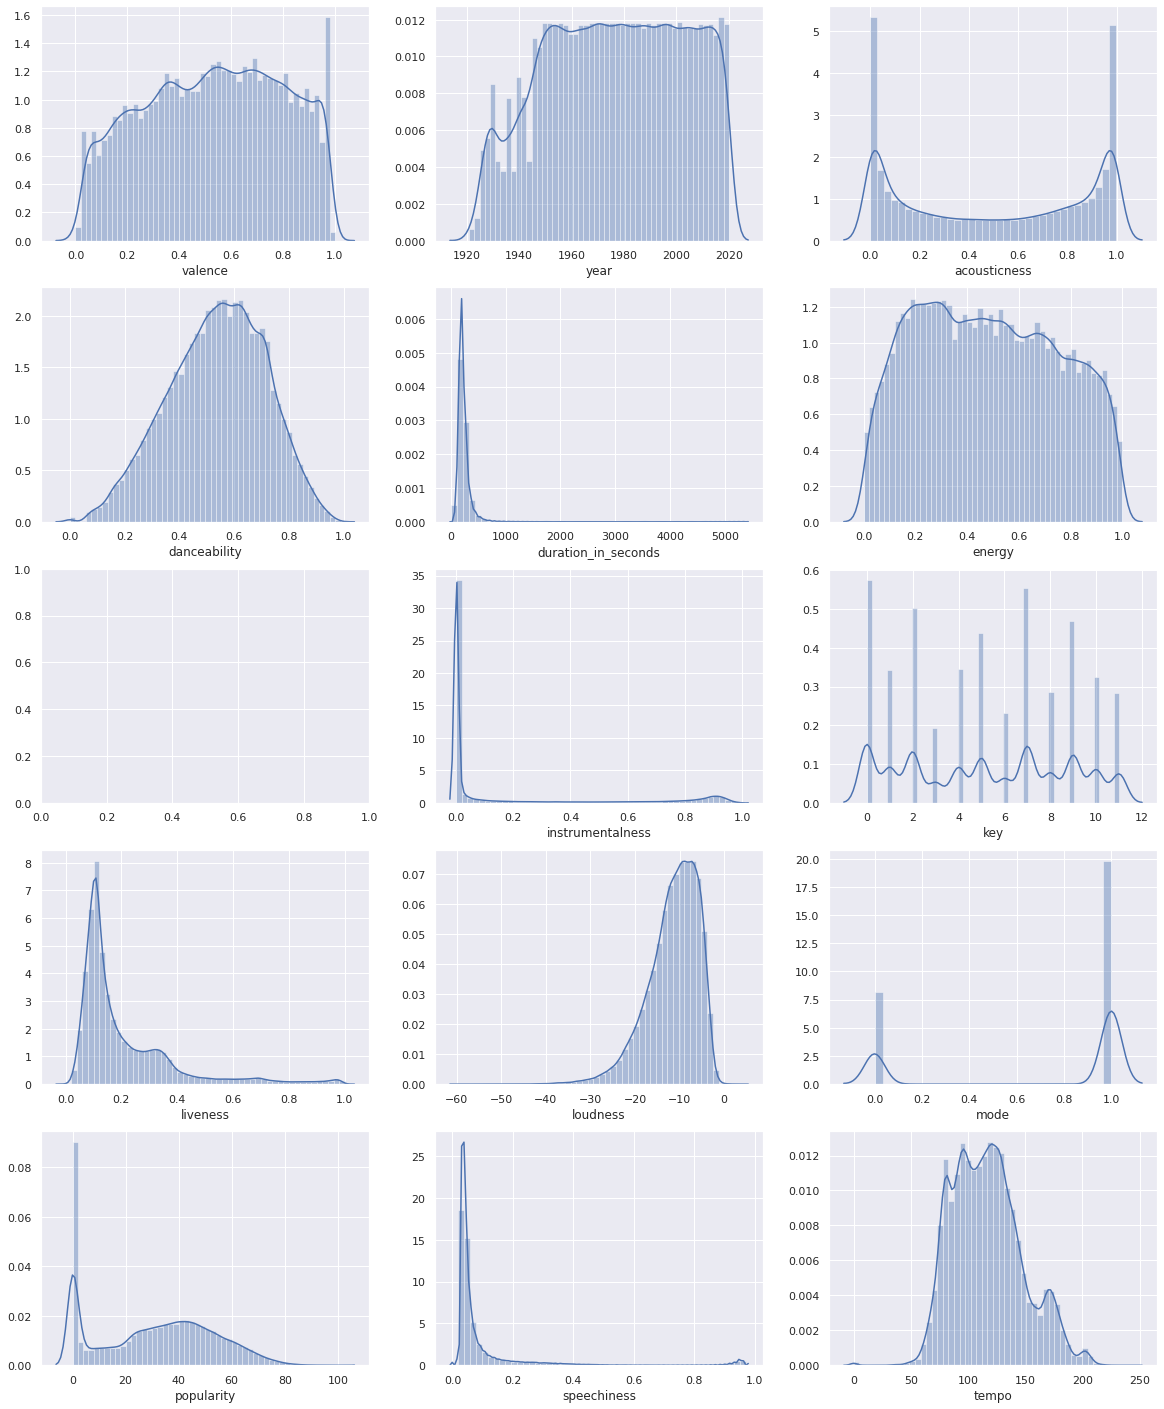

In [15]:
fig,ax = plt.subplots(5,3,figsize=(20,25))
sns.distplot(df1['valence'],ax=ax[0,0])
sns.distplot(df1['year'],ax=ax[0,1])
sns.distplot(df1['acousticness'],ax=ax[0,2])
sns.distplot(df1['danceability'],ax=ax[1,0])
sns.distplot(df1['duration_in_seconds'],ax=ax[1,1])
sns.distplot(df1['energy'],ax=ax[1,2])
#sns.distplot(df1['explicit'],ax=ax[2,0])
sns.distplot(df1['instrumentalness'],ax=ax[2,1])
sns.distplot(df1['key'],ax=ax[2,2])
sns.distplot(df1['liveness'],ax=ax[3,0])
sns.distplot(df1['loudness'],ax=ax[3,1])
sns.distplot(df1['mode'],ax=ax[3,2])
sns.distplot(df1['popularity'],ax=ax[4,0])
sns.distplot(df1['speechiness'],ax=ax[4,1])
sns.distplot(df1['tempo'],ax=ax[4,2])

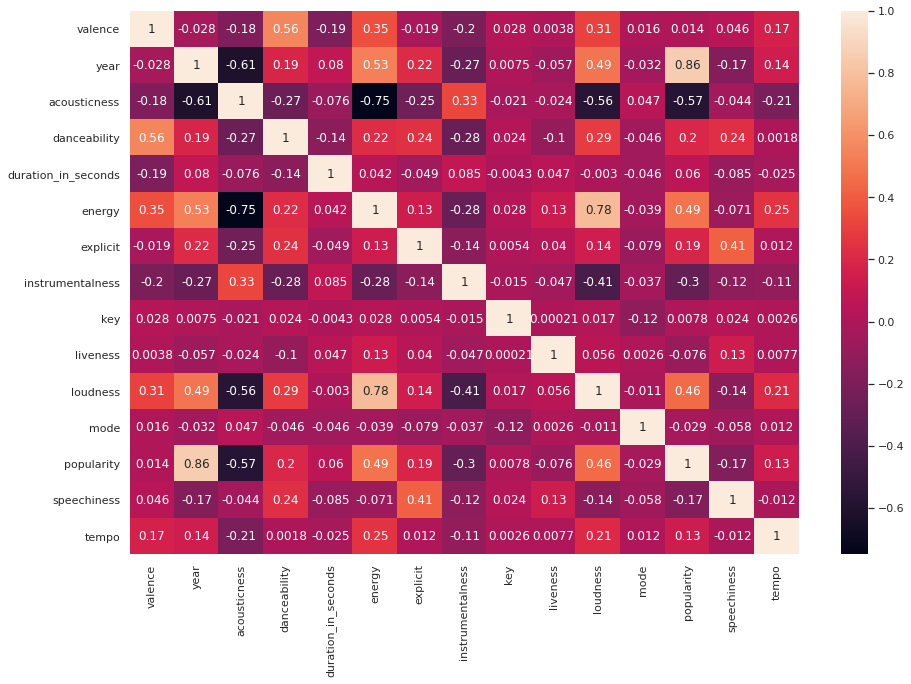

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

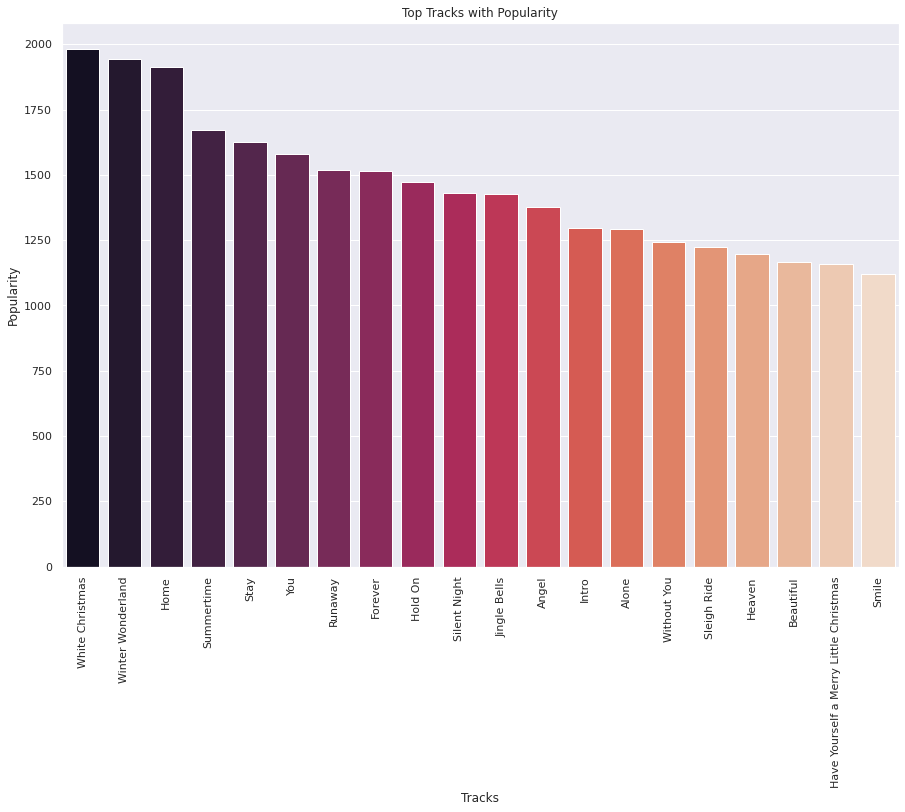

In [17]:
g_pn = df1.groupby("name")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_pn.index, g_pn,palette='rocket')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

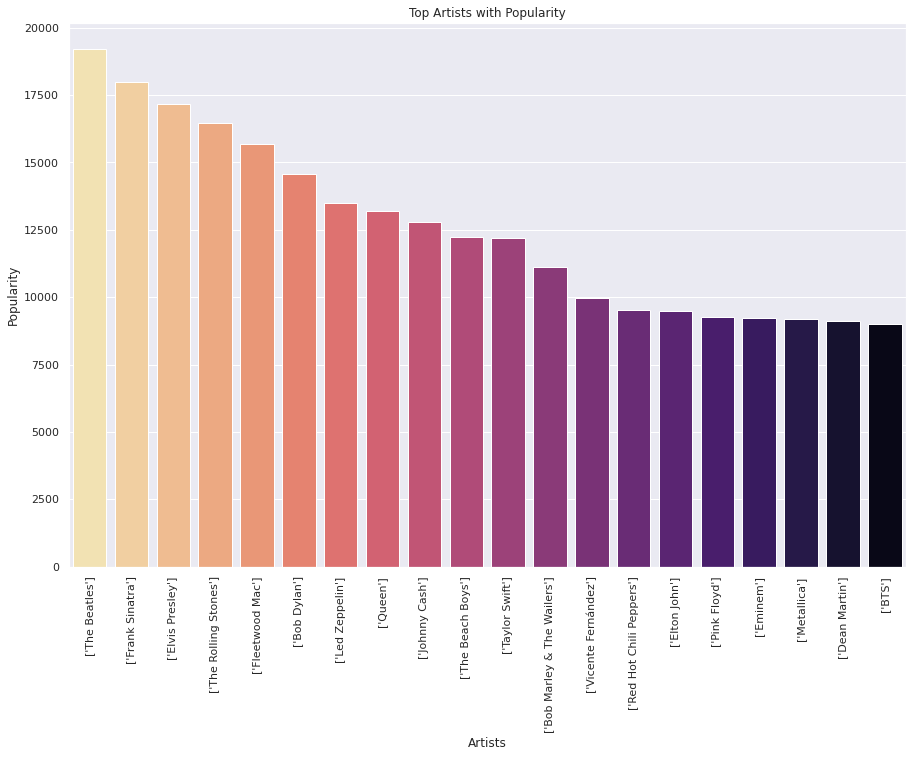

In [18]:
g_ap = df1.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_ap.index, g_ap,palette='magma_r')
axis.set_title('Top Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)

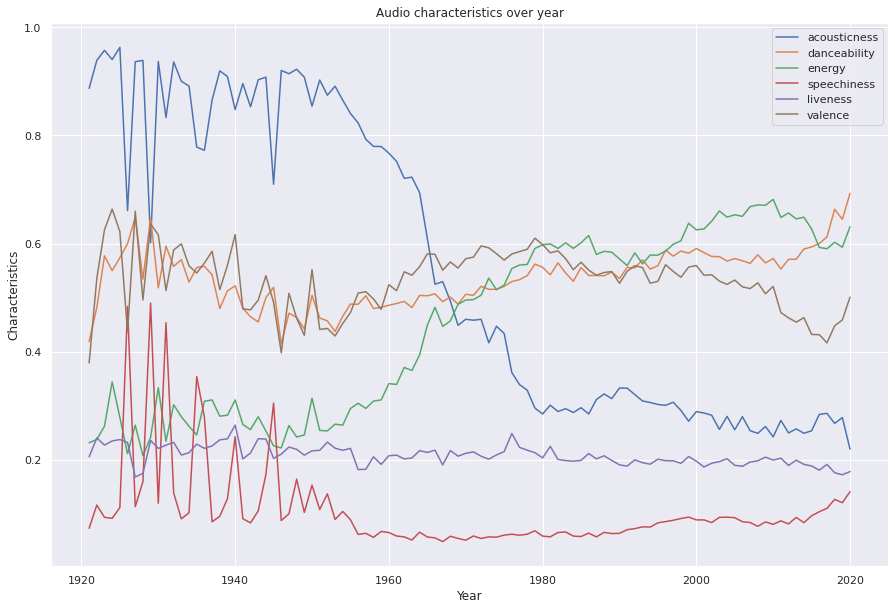

In [19]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,10))
for c in columns:
    x = df1.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over year')
plt.xlabel('Year')
plt.ylabel('Characteristics')
plt.show()

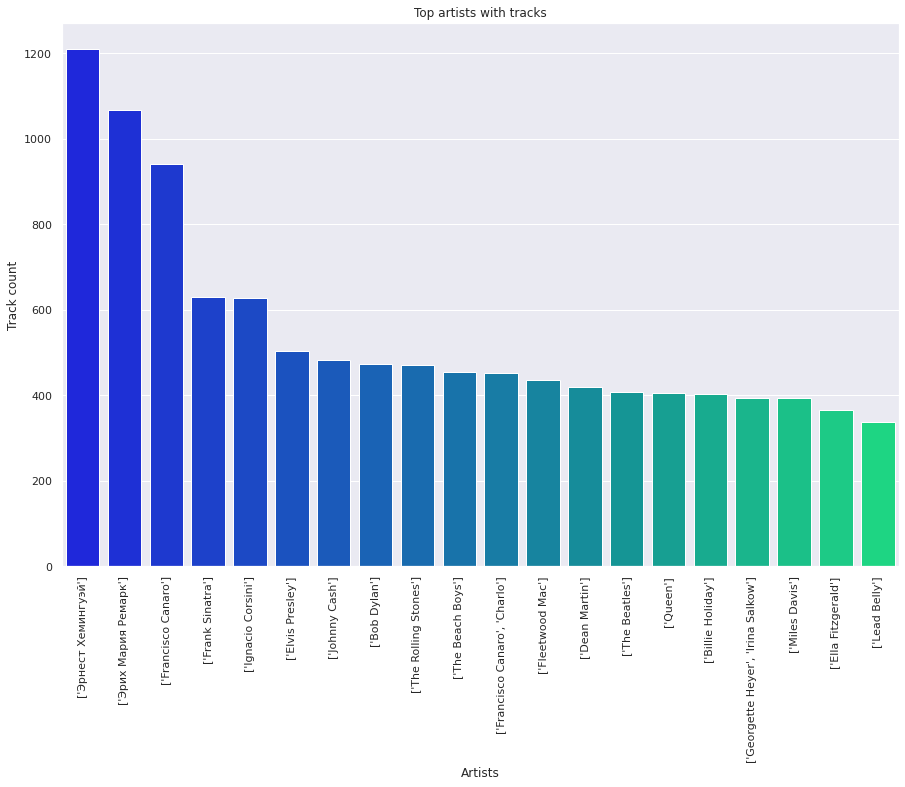

In [20]:
g_an = df1.groupby('artists')['name'].count().sort_values(ascending=False)[:20]
axis = sns.barplot(g_an.index, g_an,palette='winter')
axis.set_title('Top artists with tracks')
axis.set_ylabel('Track count')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

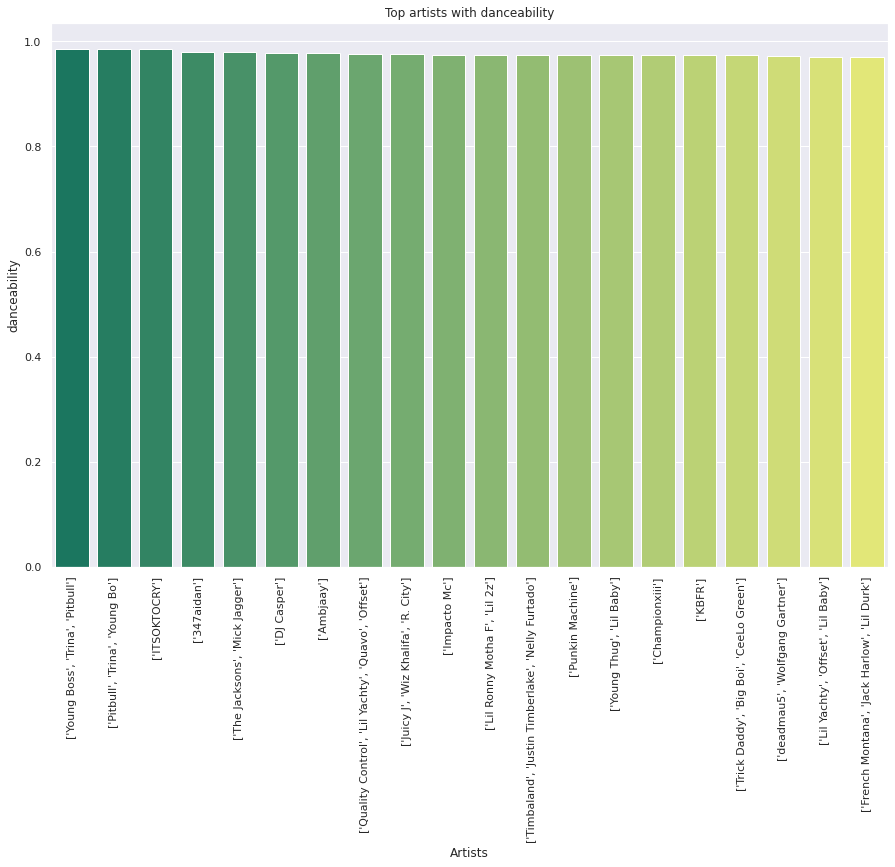

In [21]:
g_an = df1.groupby('artists')['danceability'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_an.index, g_an,palette='summer')
axis.set_title('Top artists with danceability')
axis.set_ylabel('danceability')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

In [22]:
df1['year'].describe()

count    170653.000000
mean       1976.787241
std          25.917853
min        1921.000000
25%        1956.000000
50%        1977.000000
75%        1999.000000
max        2020.000000
Name: year, dtype: float64

In [23]:
bins = [1920,1960,2000,2020]
df1['year_bins'] = pd.cut(df1['year'],bins,labels=['20s-60s','60s-2000','2000-2020'])
df1['year_bins'].head(10)

0    20s-60s
1    20s-60s
2    20s-60s
3    20s-60s
4    20s-60s
5    20s-60s
6    20s-60s
7    20s-60s
8    20s-60s
9    20s-60s
Name: year_bins, dtype: category
Categories (3, object): ['20s-60s' < '60s-2000' < '2000-2020']

In [24]:
df1['year_bins'].value_counts()

60s-2000     79406
20s-60s      51753
2000-2020    39494
Name: year_bins, dtype: int64

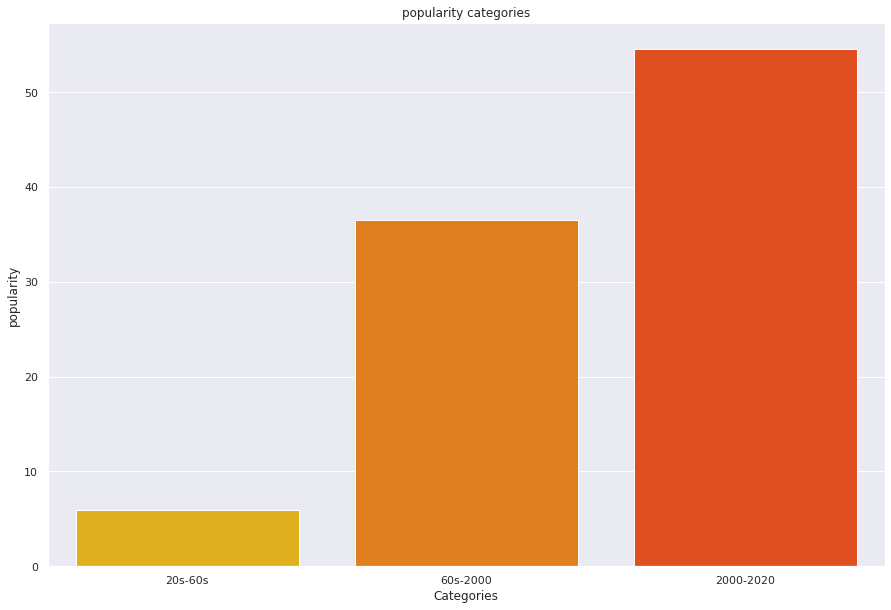

In [25]:
g_yp = df1.groupby('year_bins')['popularity'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_yp.index, g_yp,palette='autumn_r')
axis.set_title('popularity categories')
axis.set_xlabel('Categories')
axis.set_ylabel('popularity')
#plt.xticks(rotation = 90)
plt.show()

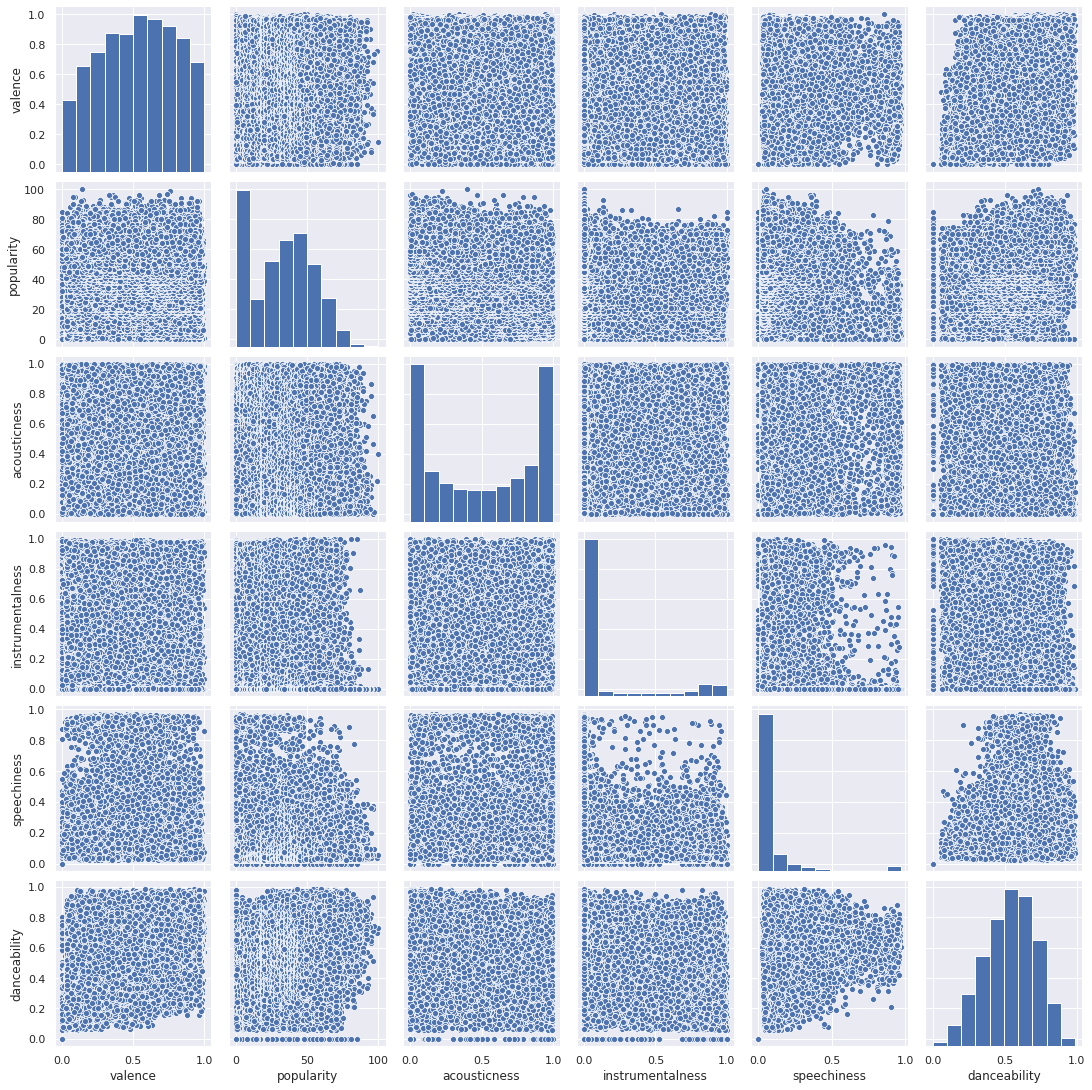

In [26]:
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df1[cols])
plt.show()

In [27]:
df1.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_in_seconds', 'energy', 'explicit', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'name', 'popularity',
       'release_date', 'speechiness', 'tempo', 'year_bins'],
      dtype='object')

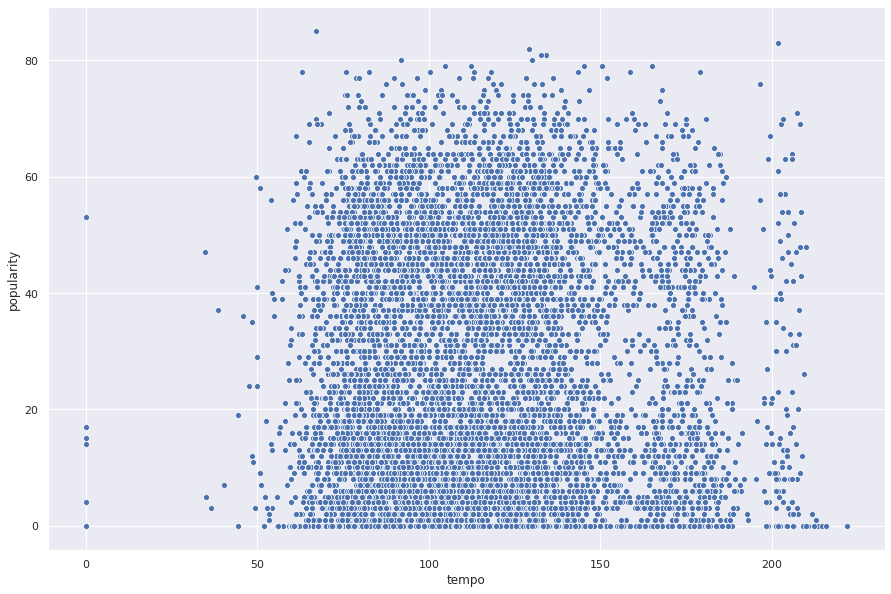

In [28]:
plt.figure()
d = df1[:10000]
sns.scatterplot('tempo','popularity',data=d)
plt.show()

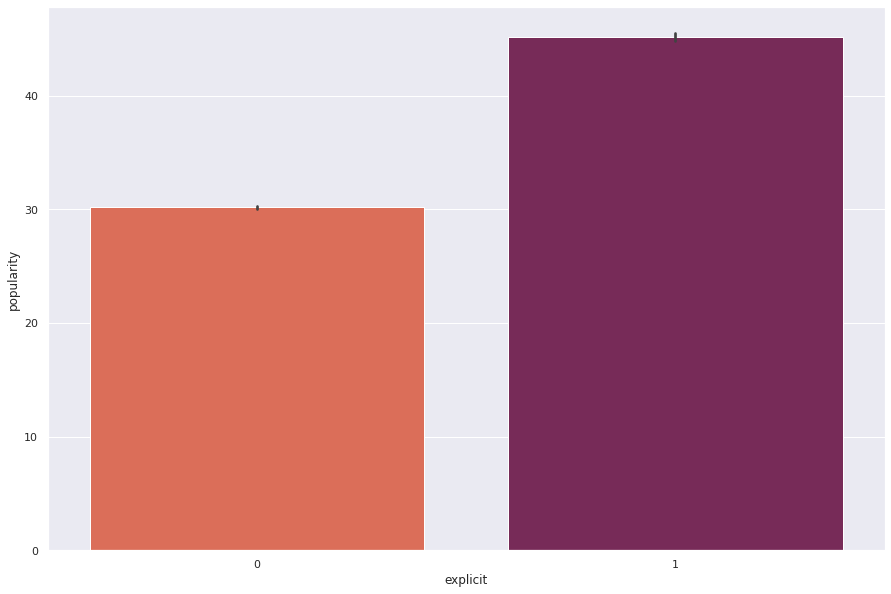

In [29]:
plt.figure()
sns.barplot('explicit','popularity',data=df1,palette='rocket_r')
plt.show()

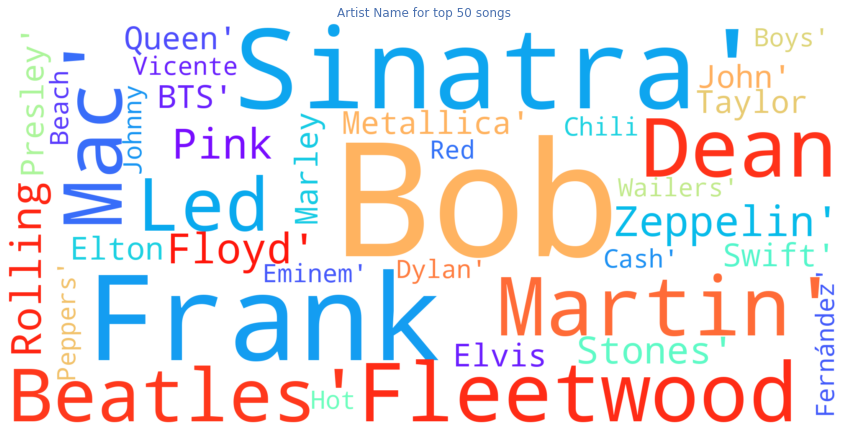

In [30]:
wrds1 = g_ap.index.str.split("(").str[0].value_counts().keys()
wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

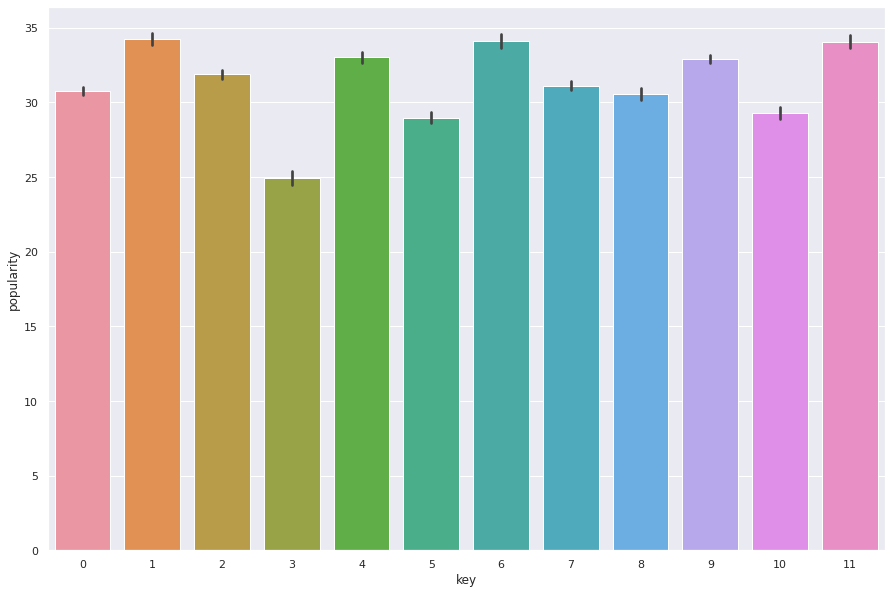

In [31]:
sns.barplot('key','popularity',data=df1)
plt.show()

# ML AND MODELLING

In [32]:
enc = LabelEncoder()
df1['Artist_enc'] = enc.fit_transform(df1['artists'])
df1['name_enc'] = enc.fit_transform(df1['name'])
df1['year_bins'] = df1['year_bins'].map({'20s-60s':0,'60s-2000':1,'2000-2020':2})
#print(df1['Artist_enc'].value_counts(),df1['name_enc'].value_counts())
df1.head(10)

,valence,year,acousticness,artists,danceability,duration_in_seconds,energy,explicit,id,instrumentalness,...,loudness,mode,name,popularity,release_date,speechiness,tempo,year_bins,Artist_enc,name_enc
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831.667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0,26839,83631
1,0.9630,1921,0.732,['Dennis Day'],0.819,180.533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0,7382,20291
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500.062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0,16378,38094
3,0.1650,1921,0.967,['Frank Parker'],0.275,210.000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0,10077,24147
4,0.2530,1921,0.957,['Phil Regan'],0.418,166.693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0,23719,123247
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395.076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,...,-12.506,1,Gati Mardika,6,1921,0.0700,119.824,0,16378,38104
6,0.4060,1921,0.996,['John McCormack'],0.518,159.507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,...,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221,0,15518,112070
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218.773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,...,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,0,26865,72365
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161.520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,...,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,0,13408,59941
9,0.7710,1921,0.982,['Fortugé'],0.684,196.560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,...,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378,0,9886,51855


In [33]:
cols = ['valence', 'Artist_enc', 'danceability',
       'duration_in_seconds', 'energy', 'explicit',
       'key', 'liveness', 'loudness', 'mode', 'name_enc', 'tempo', 'year_bins']
X = df1[cols]
y = df1['popularity']
X = X[:30000]
y = y[:30000]
print(X.shape,y.shape)

(30000, 13) (30000,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22500, 13) (7500, 13) (22500,) (7500,)


In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#models
rf = RandomForestRegressor(bootstrap=True,criterion='mse',random_state=42,max_depth=35,
                           n_estimators=2500,n_jobs=-1)
xgb = XGBRegressor( booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=4, n_estimators=4500,
             n_jobs=4, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
gbr = GradientBoostingRegressor( learning_rate=0.01,) 
dtr = DecisionTreeRegressor(criterion='mse',random_state=42,max_depth=35,
                           max_features='sqrt', min_samples_leaf=15, min_samples_split=10)
abr = AdaBoostRegressor(dtr,learning_rate=0.01)
cat =  CatBoostRegressor(learning_rate=0.1,eval_metric = 'RMSE',verbose=0)
lgb = LGBMRegressor()

In [37]:
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,xgb_pred)),mean_absolute_error(y_test,xgb_pred))

[15:59:08] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:06] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
10.045036659979889 7.5769524691820145


In [38]:
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,rf_pred)),mean_absolute_error(y_test,rf_pred))

10.263123522688247 7.615998890437956


In [39]:
lgb.fit(X_train,y_train)
lgb_pred = lgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,lgb_pred)),mean_absolute_error(y_test,lgb_pred))

10.517006112978576 7.960946402331124


In [40]:
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,dtr_pred)),mean_absolute_error(y_test,dtr_pred))

12.842966870726185 9.555254297156399


In [41]:
gbr.fit(X_train,y_train)
gbr_pred = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,gbr_pred)),mean_absolute_error(y_test,gbr_pred))

14.764570946946522 12.74938723516867


In [42]:
abr.fit(X_train,y_train)
abr_pred = abr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,abr_pred)),mean_absolute_error(y_test,abr_pred))

10.969670539875855 8.177084661418546


In [43]:
cat.fit(X_train,y_train)
cat_pred = cat.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,cat_pred)),mean_absolute_error(y_test,cat_pred))

10.448433181232211 7.87231686514142


In [44]:
output = pd.DataFrame({'Actual_Popularity':y_test,'Predicted_mean':np.round((cat_pred+xgb_pred+lgb_pred+rf_pred)/4,2)})
output.head(10)

,Actual_Popularity,Predicted_mean
2308,15,13.53
22404,1,-0.90
23397,0,6.75
25058,6,7.95
2664,9,19.44
8511,51,56.88
5148,2,15.42
7790,33,8.48
11311,58,46.36
19043,74,69.28


In [45]:
output.to_csv('output.csv',index=False)